### Data exploration - immune cells

In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(gridExtra)
library(ggh4x)

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Resave/ load dataset

Full version:

In [32]:
# save after adding more metadata
saveRDS(imm_pool, file = "/local/Nina/jupyterlab/brains_trans/imm_pool_reg.rds")

In [2]:
imm_pool <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/imm_pool_reg.rds")

Pruned version (removed doublets, some clusters reordered) - use this for final plots:

In [33]:
saveRDS(imm_pool_sub, file = "/local/Nina/jupyterlab/brains_trans/imm_pool_sub_reg.rds")

In [2]:
imm_pool_sub <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/imm_pool_sub_reg.rds")

### Plot with improved aesthetics

#### UMAP of detailed cell types

For the manuscript given the small size of the UMAP (on of the smaller subsets in Fig1) it will not be possible to display the full names on the UMAP, so I will display the number and then include the full cluster name as text in caption.

Given that I have 18 clusters in the current iteration, color selection so as to uniquely recognize them is rather difficult. I will rather generate a pallette with enough distinction that closely related clusters can be visually separated and rely on numeric labels to indicate each cluster.  
My solution for expanding the palette is based on https://r-graph-gallery.com/40-rcolorbrewer-get-a-longer-palette.html  
I try to keep it color-coordinated with the main cell types UMAP ie radial glia are in shades of purple. 

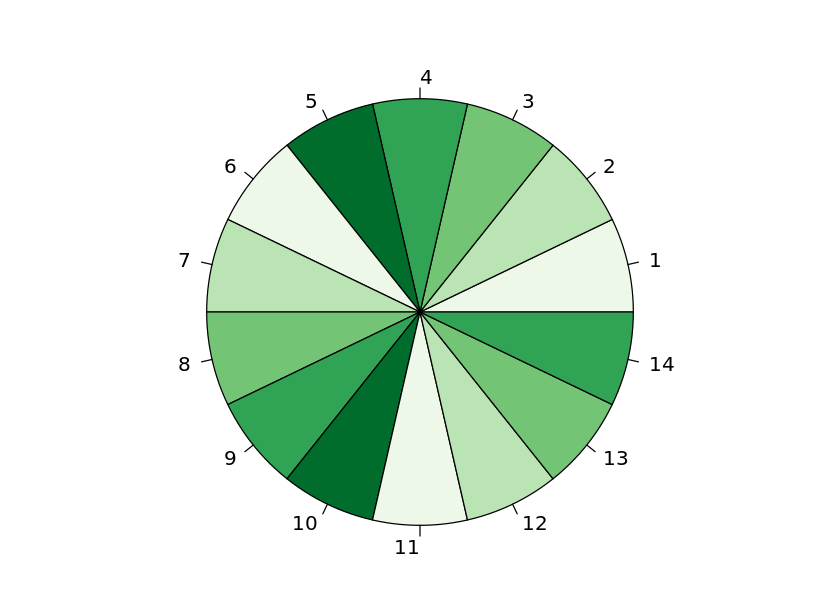

In [81]:
# No margin
par(mar=c(0,0,1,0))

# start with basic palette of Rcolor brewer, with 4 colors
col <- brewer.pal(5, "Greens") 

# Add more colors to this palette :
imm_col <- colorRampPalette(col)(14)

# Plot it
pie(rep(1, length(imm_col)), col = col , main="")

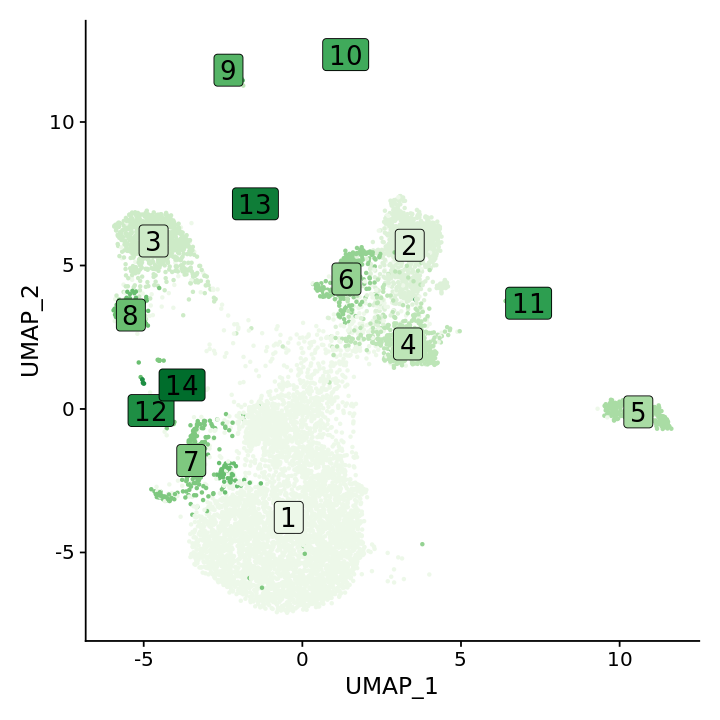

In [88]:
options(repr.plot.width=6, repr.plot.height=6)

umap_num <- DimPlot(imm_pool_sub, label = TRUE, cols = imm_col, 
        label.size = 5.5, label.box = TRUE, pt.size = 0.6, raster = FALSE) + NoLegend()
umap_num
#group.by = "pc28_res0.8_clusters_numeric_edited", 

In [89]:
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/imm_sub_umap_numbered.pdf", 
       plot = umap_num, 
       units = "in", height = 6, width = 6)


#### Brain regions per cluster

In [4]:
brain.reg.by.cluster <- table(imm_pool_sub$brain_reg, imm_pool_sub$pc20_res0.6_clusters_numeric_edited)

In [5]:
brain.reg.by.cluster.diss <- brain.reg.by.cluster[c(1:4),]
brain.reg.by.cluster.diss

      
         1   2   3  15   4   5   6   7   8  16   9  10  11  12  13  14  17
  dien 891 227 243   0  46  33  44  33  20   0  20  12   6   6   5   2   0
  mes  905  79  36   0  48  47  32  32  11   0   9   7  11   5   5   1   0
  rhom 601 141 121   0  80  47  57  14  10   0   7   4  14   1  11   0   0
  tel  377 125  16   0  72  15  30  60  14   0  14  14   3   4   3   8   0

In [15]:
# remove missing columns
brain.reg.by.cluster.diss <- brain.reg.by.cluster.diss[,-c(4, 10, 17)]

In [16]:
brain.reg.by.cluster.diss

      
         1   2   3   4   5   6   7   8   9  10  11  12  13  14
  dien 891 227 243  46  33  44  33  20  20  12   6   6   5   2
  mes  905  79  36  48  47  32  32  11   9   7  11   5   5   1
  rhom 601 141 121  80  47  57  14  10   7   4  14   1  11   0
  tel  377 125  16  72  15  30  60  14  14  14   3   4   3   8

In [17]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
brain.reg.by.cluster.diss.norm <- round(prop.table(brain.reg.by.cluster.diss, margin = 1), digits = 10) * 100

In [18]:
brain.reg.by.cluster.diss.norm

      
                 1           2           3           4           5           6
  dien 56.10831234 14.29471033 15.30226700  2.89672544  2.07808564  2.77078086
  mes  73.69706840  6.43322476  2.93159609  3.90879479  3.82736156  2.60586319
  rhom 54.24187726 12.72563177 10.92057762  7.22021661  4.24187726  5.14440433
  tel  49.93377483 16.55629139  2.11920530  9.53642384  1.98675497  3.97350993
      
                 7           8           9          10          11          12
  dien  2.07808564  1.25944584  1.25944584  0.75566751  0.37783375  0.37783375
  mes   2.60586319  0.89576547  0.73289902  0.57003257  0.89576547  0.40716612
  rhom  1.26353791  0.90252708  0.63176895  0.36101083  1.26353791  0.09025271
  tel   7.94701987  1.85430464  1.85430464  1.85430464  0.39735099  0.52980132
      
                13          14
  dien  0.31486146  0.12594458
  mes   0.40716612  0.08143322
  rhom  0.99277978  0.00000000
  tel   0.39735099  1.05960265

In [19]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
brain.reg.by.cluster.diss.df <- as.data.frame(round(prop.table(brain.reg.by.cluster.diss.norm, margin = 2), digits = 10))
colnames(brain.reg.by.cluster.diss.df) <- c("Brain.reg", "Cluster", "Fraction")

In [20]:
head(brain.reg.by.cluster.diss.df)

,Brain.reg,Cluster,Fraction
,<fct>,<fct>,<dbl>
1,dien,1,0.2397985
2,mes,1,0.3149703
3,rhom,1,0.2318217
4,tel,1,0.2134095
5,dien,2,0.2858378
6,mes,2,0.1286391


In [23]:
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) +
    geom_bar(stat="identity") +  
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="Cluster", y="Fraction") +  
    theme(axis.title = element_text(size = 18), axis.text = element_text(size = 16),   plot.title = element_text(size = 16, hjust = 0.5), legend.text = element_text(size = 20), legend.title = element_text(size = 22), legend.position = "bottom")  + 
    coord_flip() + 
    scale_fill_manual(values = reg_colors, name = "Brain region", limits = c("tel", "dien", "mes", "rhom"))

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



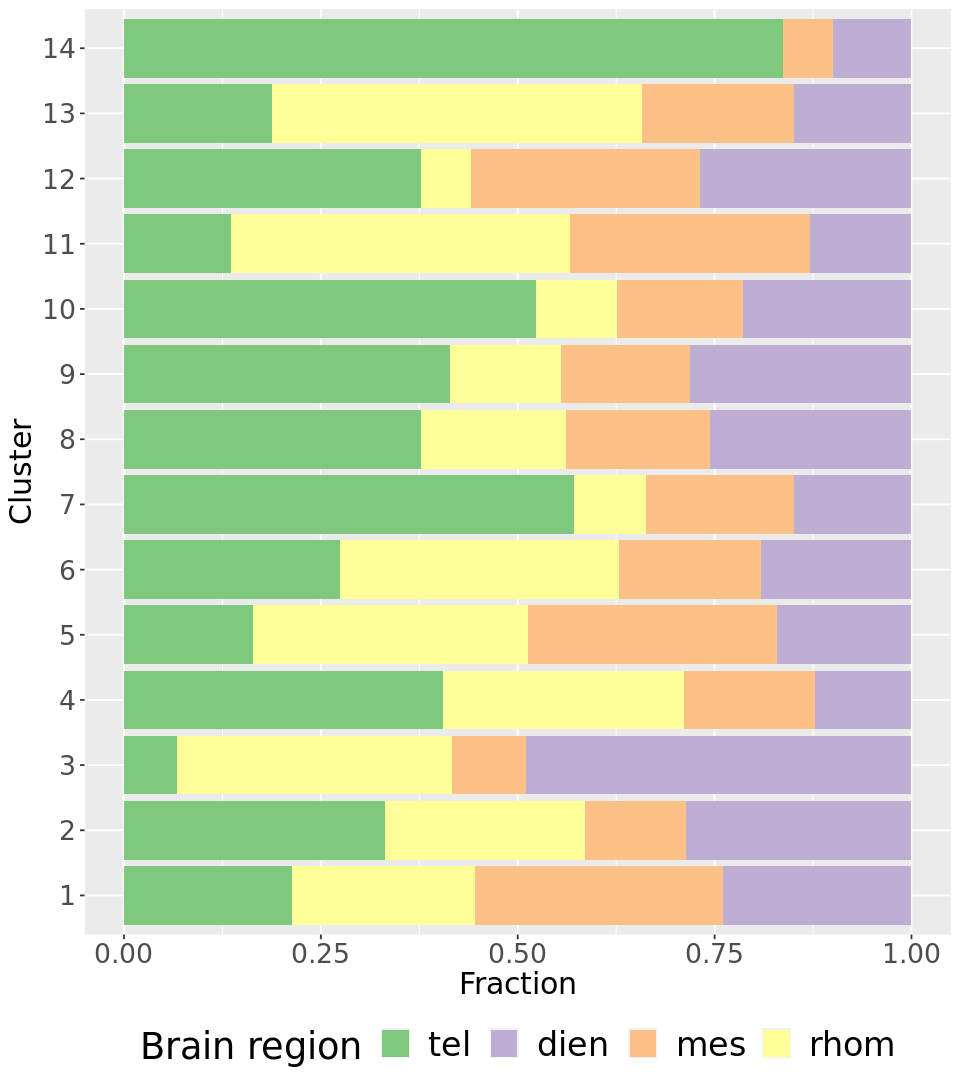

In [25]:
options(repr.plot.width=8, repr.plot.height=9)

p_br_diss

In [26]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/imm_sub_barplot_regions.pdf",
       plot = p_br_diss, units = "in", height = 9, width = 8)

#### Regional specificity for named cluster - set exact size

In [3]:
brain.reg.by.cluster <- table(imm_pool_sub$brain_reg, imm_pool_sub$pc20_res0.6_named_detailed_short_num)

In [4]:
brain.reg.by.cluster.diss <- brain.reg.by.cluster[c(1:4),]
brain.reg.by.cluster.diss

      
       1. Mgl 2. Tc il2rb+ 3. Mcph siglec15l+ 4. Tc zap70+ 5. Th2-like il4+
  dien    891          227                243           46               33
  mes     905           79                 36           48               47
  rhom    601          141                121           80               47
  tel     377          125                 16           72               15
      
       6. Tc lcp2b+ 7. Mcph ccl34a.4+ 8. Mcph ccl35.2+ 9. Mcph p2rx3a+ 10. Bc
  dien           44                33               20              20     12
  mes            32                32               11               9      7
  rhom           57                14               10               7      4
  tel            30                60               14              14     14
      
       11. Tc-like spink4+ 12. Prol. imm 13. Neut 14. BV/throm 15. Imm/other
  dien                   6             6        5            2             0
  mes                   11             5        5      

In [5]:
# exclude clusters absent from this subset - 15, 16, 17
brain.reg.by.cluster.diss <- brain.reg.by.cluster.diss[,-c(15,16,17)]
brain.reg.by.cluster.diss

      
       1. Mgl 2. Tc il2rb+ 3. Mcph siglec15l+ 4. Tc zap70+ 5. Th2-like il4+
  dien    891          227                243           46               33
  mes     905           79                 36           48               47
  rhom    601          141                121           80               47
  tel     377          125                 16           72               15
      
       6. Tc lcp2b+ 7. Mcph ccl34a.4+ 8. Mcph ccl35.2+ 9. Mcph p2rx3a+ 10. Bc
  dien           44                33               20              20     12
  mes            32                32               11               9      7
  rhom           57                14               10               7      4
  tel            30                60               14              14     14
      
       11. Tc-like spink4+ 12. Prol. imm 13. Neut 14. BV/throm
  dien                   6             6        5            2
  mes                   11             5        5            1
  rhom              

In [6]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
brain.reg.by.cluster.diss.norm <- round(prop.table(brain.reg.by.cluster.diss, margin = 1), digits = 10)
#brain.reg.by.cluster.norm <- brain.reg.by.cluster.perc1 * 100

In [7]:
brain.reg.by.cluster.diss.norm

      
             1. Mgl 2. Tc il2rb+ 3. Mcph siglec15l+ 4. Tc zap70+
  dien 0.5610831234 0.1429471033       0.1530226700 0.0289672544
  mes  0.7369706840 0.0643322476       0.0293159609 0.0390879479
  rhom 0.5424187726 0.1272563177       0.1092057762 0.0722021661
  tel  0.4993377483 0.1655629139       0.0211920530 0.0953642384
      
       5. Th2-like il4+ 6. Tc lcp2b+ 7. Mcph ccl34a.4+ 8. Mcph ccl35.2+
  dien     0.0207808564 0.0277078086      0.0207808564     0.0125944584
  mes      0.0382736156 0.0260586319      0.0260586319     0.0089576547
  rhom     0.0424187726 0.0514440433      0.0126353791     0.0090252708
  tel      0.0198675497 0.0397350993      0.0794701987     0.0185430464
      
       9. Mcph p2rx3a+       10. Bc 11. Tc-like spink4+ 12. Prol. imm
  dien    0.0125944584 0.0075566751        0.0037783375  0.0037783375
  mes     0.0073289902 0.0057003257        0.0089576547  0.0040716612
  rhom    0.0063176895 0.0036101083        0.0126353791  0.0009025271
  tel     0.01

In [8]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
brain.reg.by.cluster.diss.df <- as.data.frame(round(prop.table(brain.reg.by.cluster.diss.norm, margin = 2), digits = 10))
colnames(brain.reg.by.cluster.diss.df) <- c("Brain.reg", "Cluster", "Fraction")

In [9]:
head(brain.reg.by.cluster.diss.df)

,Brain.reg,Cluster,Fraction
,<fct>,<fct>,<dbl>
1,dien,1. Mgl,0.2397985
2,mes,1. Mgl,0.3149703
3,rhom,1. Mgl,0.2318217
4,tel,1. Mgl,0.2134095
5,dien,2. Tc il2rb+,0.2858378
6,mes,2. Tc il2rb+,0.1286391


In [10]:
# pallette for brain regions based on https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=5
reg_colors <- c("tel" = "#7fc97f", #green
                "dien" = "#beaed4", #purple
                "mes" = "#fdc086", #orange
                "rhom" = "#ffff99", #yellow
                "whole" = "#386cb0" #blue
                )

Use additional function from ggh4x package to define panel size (so I can keep bar size consistent across different datasets).  

In [11]:
# adjusted text sizes, no legend, no grid, with plot title
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) +
    geom_bar(stat="identity") + 
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="", y="", title = "Immune cells") +  
    theme(axis.title = element_text(size = 6.5), axis.text = element_text(size = 5), axis.text.x = element_text(angle = 45, hjust = 1, vjust = 0.95), plot.title = element_text(size = 7), 
        legend.position = "none",
        axis.text.y = element_blank(),
        panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = "white")) +
    scale_fill_manual(values = reg_colors, name = "Brain region", 
                      breaks = c("tel", "dien", "mes", "rhom")) +
    force_panelsizes(rows = unit(35, "mm"),
                   cols = unit(63, "mm"))

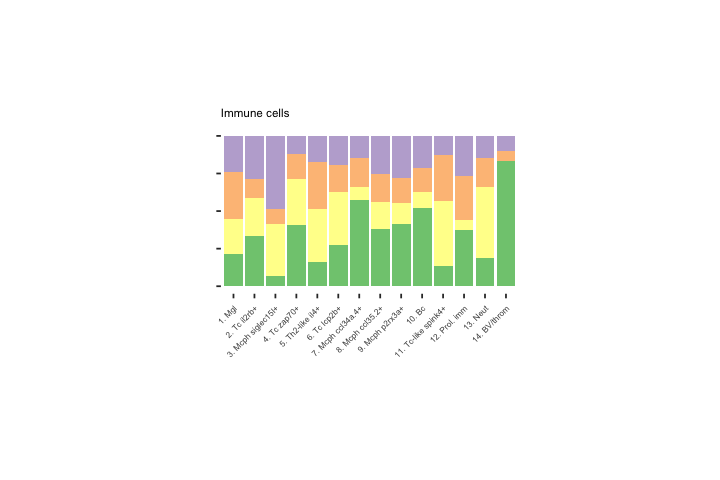

In [12]:
options(repr.plot.width=6, repr.plot.height=4)

p_br_diss

In [14]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/imm_sub_barplot_regions_setsize_label.pdf",
       plot = p_br_diss, units = "mm", height = 61, width = 70)

#### Markers dotplot

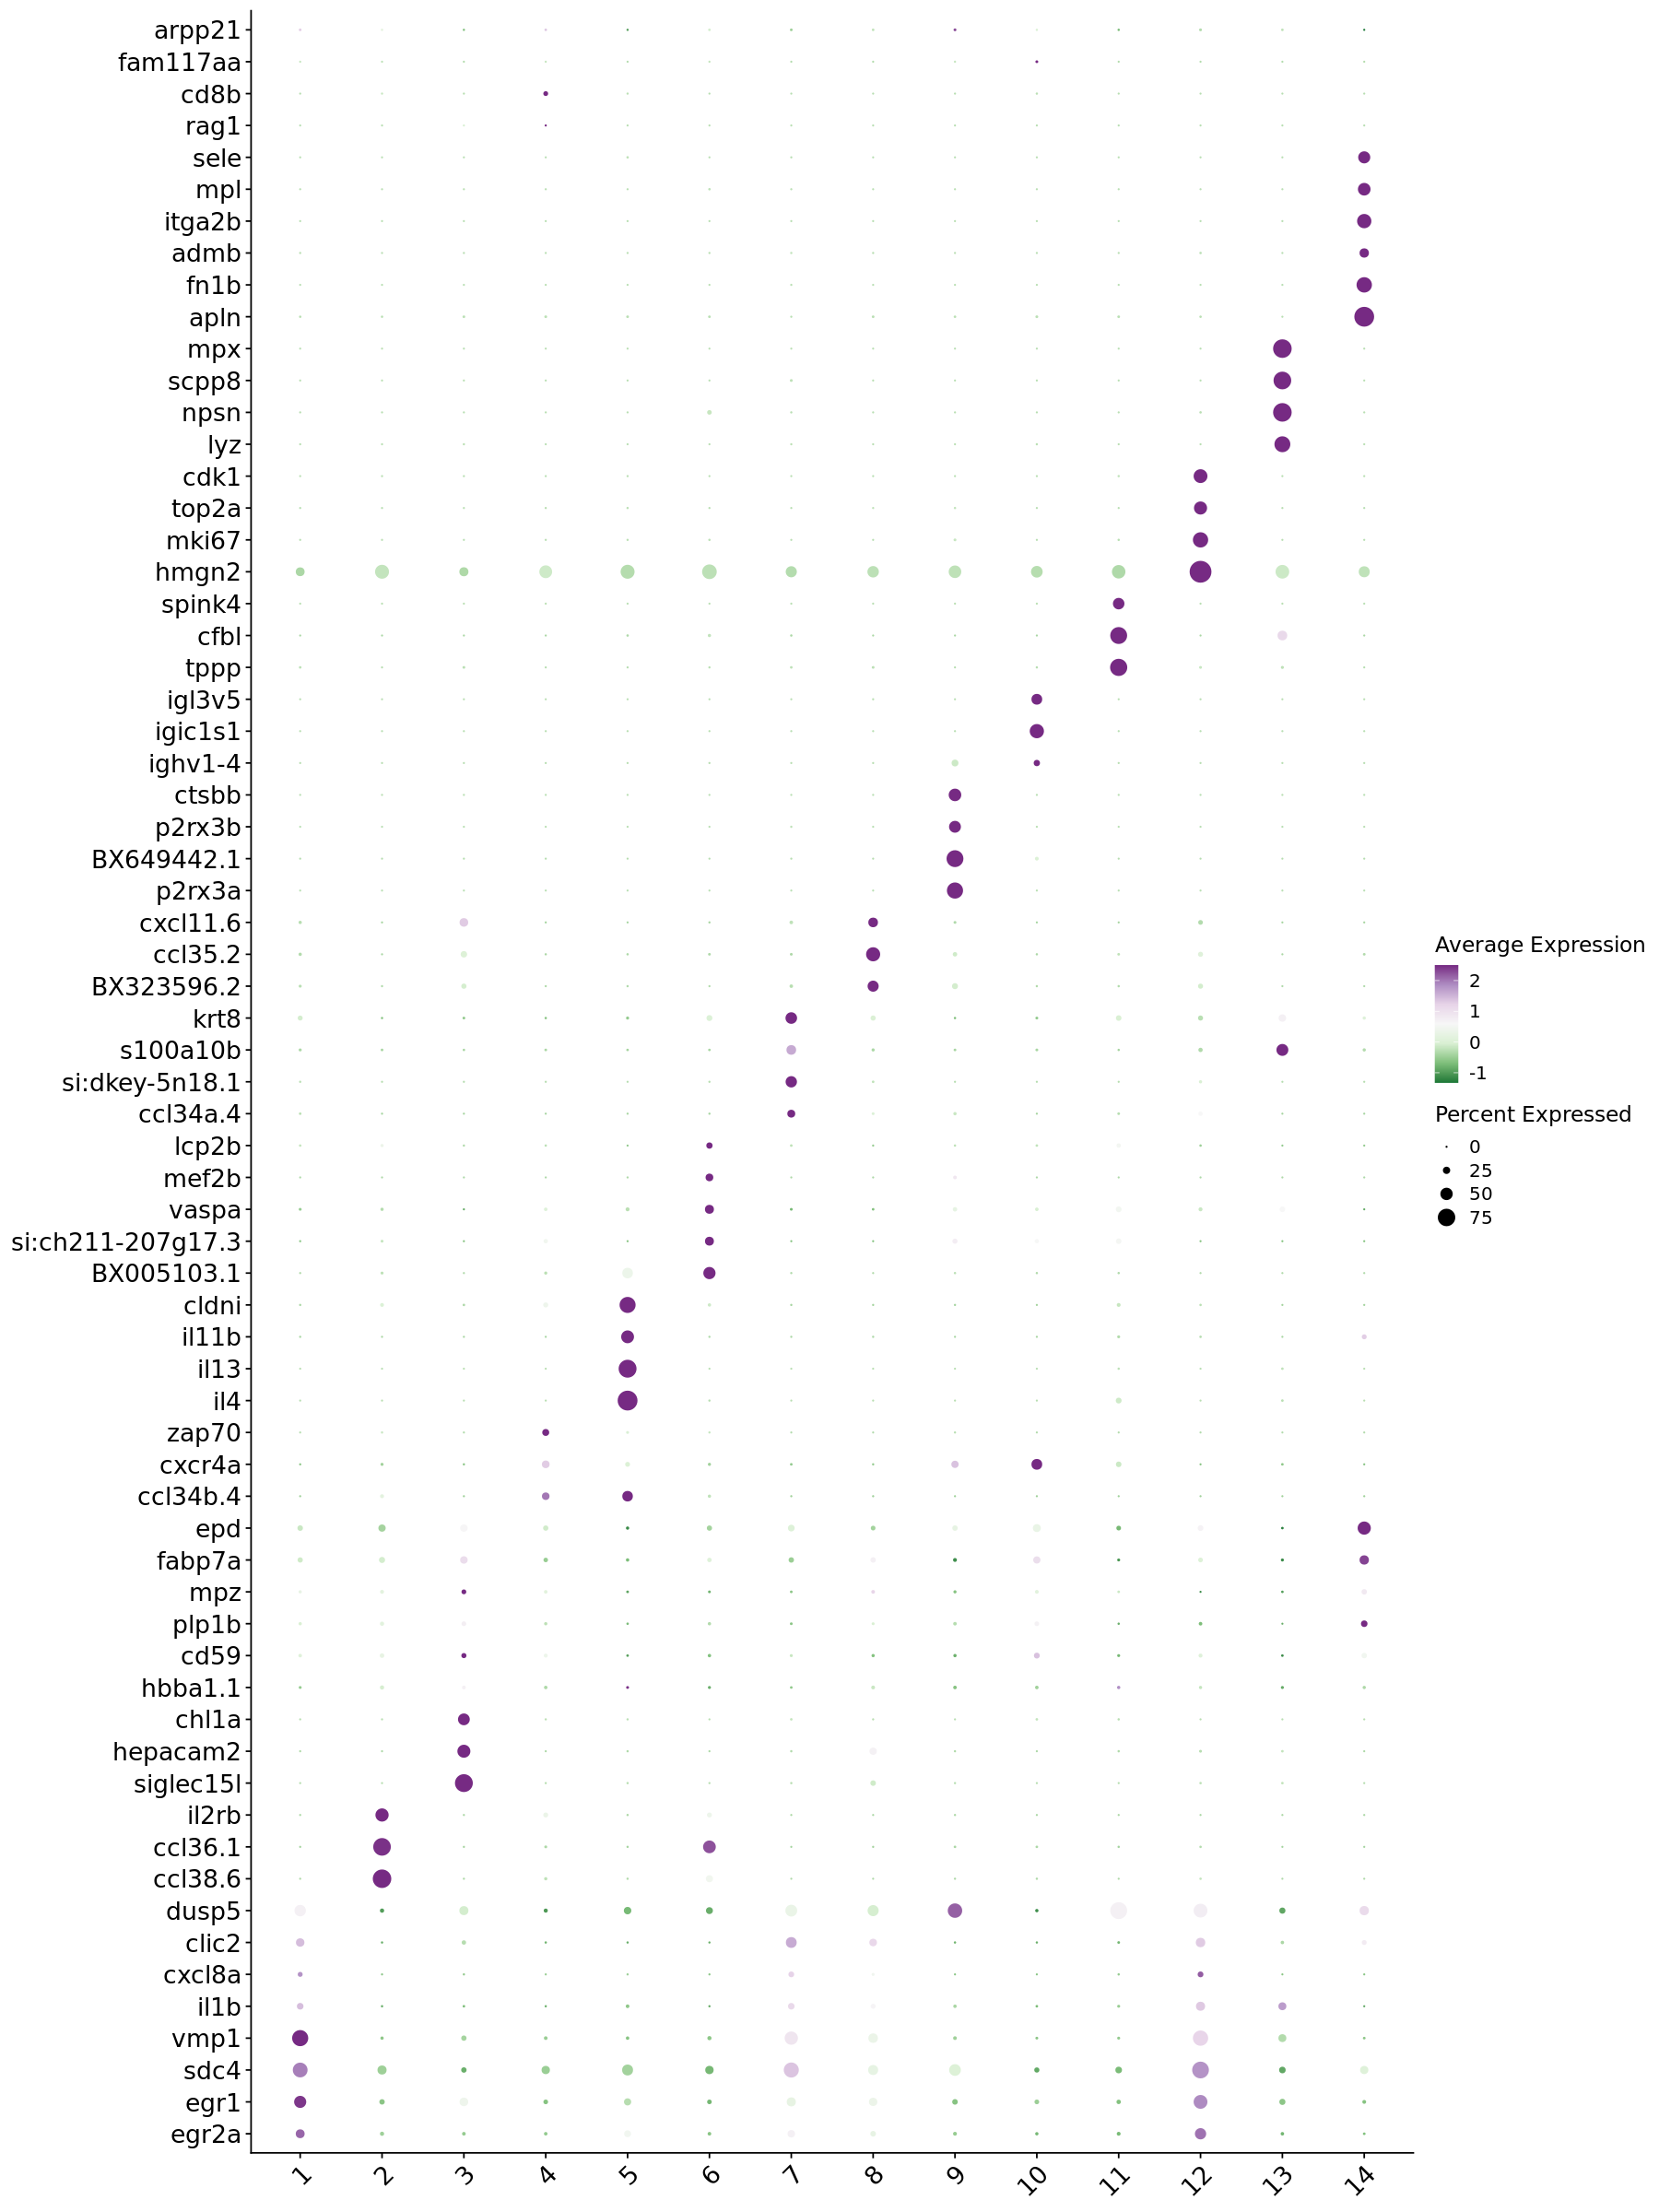

In [32]:
options(repr.plot.width=15, repr.plot.height=20)

dotplot_unique <- DotPlot(imm_pool_sub, features = unique_markers_vector, cols = "PRGn") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16), axis.title = element_blank()) + 
        RotatedAxis() +
        coord_flip()
dotplot_unique

In [33]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/imm_sub_dotplot_unique.pdf",
       plot = dotplot_unique, units = "in", height = 20, width = 15)

### Export annotation (detailed cell types)

For consistency (so that I have detailed ID for all cells shown in Fig1B) I will export IDs for the cells of imm_pool, rather than only the subset of curated cells (with doublets and batchy clusters excluded). But I add a column to the metadata table to indicate the clusters flagged for exclusion more clearly.  

In [3]:
dim(imm_pool_sub)

[1] 24332  9345

In [3]:
str(imm_pool@meta.data)

'data.frame':	10234 obs. of  22 variables:
 $ orig.ident                         : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ nCount_RNA                         : num  1362 557 544 1081 518 ...
 $ nFeature_RNA                       : int  353 236 211 328 232 504 618 1075 501 448 ...
 $ multiseq.relative.1.7              : chr  NA NA NA NA ...
 $ brain_reg                          : chr  "tel" "tel" "tel" "tel" ...
 $ kit_chem                           : chr  "3prim_v1" "3prim_v1" "3prim_v1" "3prim_v1" ...
 $ fixation                           : chr  "fresh" "fresh" "fresh" "fresh" ...
 $ percent.mt                         : num  2.103 1.409 0 0.799 0.175 ...
 $ ident                              : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ scDblFinder.class                  : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ scDblFinder.score                  : num  0.0455 0.03043 0.00503 0.02666 0.02809 ...
 $ scDblFinder.weighted               : num  0.189 0.245 0.174 0.1

In [9]:
imm_pool_ann <- data.frame("Barcode" = imm_pool@assays$RNA@counts@Dimnames[[2]],
                          "Orig_ident" = imm_pool$orig.ident,
                           "Brain_reg_lib" = imm_pool$brain_reg,
                           "Fixation" = imm_pool$fixation,
                          "Celltype_major" = imm_pool$major_celltypes_pc28_res0.6,
                           "Celltype_detailed" = imm_pool$pc20_res0.6_named_detailed,
                           "Celltype_detailed_short" = imm_pool$pc20_res0.6_named_detailed_short, 
                           "Keep_in_final" = TRUE
                          )

head(imm_pool_ann)

,Barcode,Orig_ident,Brain_reg_lib,Fixation,Celltype_major,Celltype_detailed,Celltype_detailed_short,Keep_in_final
,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<lgl>
B1.T_AAACGGCTTTCCAT-1,B1.T_AAACGGCTTTCCAT-1,b1_tel,tel,fresh,Immune cells,Th2-like cells il4+,Th2-like il4+,TRUE
B1.T_AAAGATCTGTTCTT-1,B1.T_AAAGATCTGTTCTT-1,b1_tel,tel,fresh,Immune cells,Microglia,Mgl,TRUE
B1.T_AAATCAACGAACCT-1,B1.T_AAATCAACGAACCT-1,b1_tel,tel,fresh,Immune cells,Microglia,Mgl,TRUE
B1.T_AACACGTGCAAGCT-1,B1.T_AACACGTGCAAGCT-1,b1_tel,tel,fresh,Immune cells,T cells zap70+,Tc zap70+,TRUE
B1.T_AACCTACTGAGACG-1,B1.T_AACCTACTGAGACG-1,b1_tel,tel,fresh,Immune cells,T cells zap70+,Tc zap70+,TRUE
B1.T_AAGACAGAGTACGT-1,B1.T_AAGACAGAGTACGT-1,b1_tel,tel,fresh,Immune cells,Microglia,Mgl,TRUE


In [7]:
imm_pool_ann[which(imm_pool_ann$Celltype_detailed == "Immune/other doublet"),]$Keep_in_final <- FALSE
imm_pool_ann[which(imm_pool_ann$Celltype_detailed == "Microglia (batchy)"),]$Keep_in_final <- FALSE
imm_pool_ann[which(imm_pool_ann$Celltype_detailed == "T cell (batchy)"),]$Keep_in_final <- FALSE
table(imm_pool_ann$Keep_in_final)


FALSE  TRUE 
  889  9345 

In [8]:
write.csv(imm_pool_ann, file = "/local/Nina/jupyterlab/brains_trans/ann_imm_pool_reg_20pcs_res0-6.csv")